# 병합 계층 클러스터링 실습

**agglomerative hierarchical clustering**


데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해 해당 데이터 포인트가 속할 그룹을 결정한다.

병합 계층 클러스터링은 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하여, 클러스터 간 유사도가 높을 경우에 두 개의 클러스터를 하나의 클러스터로 합치는 과정을 하나의 클러스터링이 될 때까지 반복한다.

분할 계층 클러스터링은 전체 데이터 셋을 하나의 클러스터로 놓고 시작하여, 가장 멀리 떨어진 데이터를 다른 클러스터로 분리하는 방법.

~~사실 제대로 이해 안가는 부분도 많아서 우선 실습만 하려고 한다. 갈길이 멀어~~

##### 장점
계층 클러스터링은 덴드로그램을 통해 시각화 할 수 있다.  각 레벨에서 데이터가 어떻게 분리되는지 시각적으로 확인할 수 있다.

클러스터 개수를 미리 지정할 필요가 없다는 장점이 있다.

##### 알고리즘

1. 각 데이터 포인트를 개별 클러스터로 설정하여 데이터 개수만큼 클러스터를 설정해둔다. 그리고 각 데이터 간 거리 행렬 $D_{n \times n}$을 계산한ㄷ.
2. 거리 행렬 $D$에서 가장 가까운 클러스터 쌍을 찾는다. $min_{i,j} \{ d_{ij} \} $ 을 찾는다.
3. 2에서 찾은 가장 가까운 클러스터 쌍을 하나의 클러스터로 합친다. $u, v$ 라면 새로운 클러스터 $(uv)$ 를 만든다.
4. 새로운 클러스터에 대하여 행과 열을 추가하겨 기존의 $u, v$ 에 관한 행과 열은 삭제한다. 
        (1) 단일 연결: $ d_{(uv)w} = \min \{ d_{uw}, d_{vw} \} $
        (2) 완전 연결: $ d_{(uv)w} = \max \{ d_{uw}, d_{vw} \} $
5. 클러스터가 1개가 될 때까지 2-4단계를 반복하며, 반복횟수는 $n-1$번이 된다.



##### 11.3.5 임의로 데이터를 생성하여 클러스터링 해보는 실습.

# Data generating
## 임의 데이터 생성

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 10,     # 10개, 피처의 개수는 2
                 n_features = 2,
                 random_state = 0)

## 생성된 데이터 차원 확인

In [2]:
print(X.shape)
print(y.shape)

(10, 2)
(10,)


피처 데이터는 2차원 데이터 10개가 생성되어있다. 타깃 데이터의 차원은 1차원 데이터가 10개 생성되어있는 상태. (10행 1열)

# 병합 계층 클러스터링

병합 계층 클러스터링 알고리즘을 통해 군집화를 진행해보도록 한다.

## 하나의 클러스터로 군집

    클러스터로 병합하지 않고, 각 데이터 포인트가 하나의 클러스터로 병합되는 것을 보기 위해서 n_clusters = None 으로 설정한다.
    이때 n_clusters = None 으로 설정하기 위해서는 distnace_threshold = 0 이라는 옵션이 필요하다.
    또한 연결방법은 완전 연결방법인 linkage = 'complete' 로 설정한다.
    
모형을 적합하고 예측값을 구해야하는데 AgglomerativeClustering은 .predict 함수를 따로 제공하지 않고 fit_predict(적합 후 예측) 를 사용한다.

In [3]:
from sklearn.cluster import AgglomerativeClustering

# 하나의 클러스터가 되는 과정을 볼 것
aggc = AgglomerativeClustering(n_clusters = None,     # n_clusters = 구하려는 클러스터 개수
                              distance_threshold = 0, 
                              linkage = 'complete')
label_aggc = aggc.fit_predict(X)

# 데이터 포인트들의 label after aggc 
print(label_aggc)

[8 9 6 4 5 2 7 3 1 0]


## 두 개의 클러스터로 군집

이번에는 두 개의 클러스터로 묶어본다.

In [4]:
# 두 개의 클러스터가 되는 과정을 볼 것
aggc2 = AgglomerativeClustering(n_clusters = 2,     # n_clusters = 구하려는 클러스터 개수
                              linkage = 'complete')
label_aggc2 = aggc2.fit_predict(X)

# 데이터 포인트들의 label after aggc2 
print(label_aggc2)

[0 0 0 0 0 0 1 0 0 0]


## 세 개의 클러스터로 군집

이번은 세 개의 클러스터로 묶어본다.

In [5]:
# 세 개의 클러스터가 되는 과정을 볼 것
aggc3 = AgglomerativeClustering(n_clusters = 3,     # n_clusters = 구하려는 클러스터 개수
                              linkage = 'complete')
label_aggc3 = aggc3.fit_predict(X)

# 데이터 포인트들의 label after aggc3
print(label_aggc3)

[0 0 2 0 0 0 1 2 2 0]


# 덴드로그램 시각화

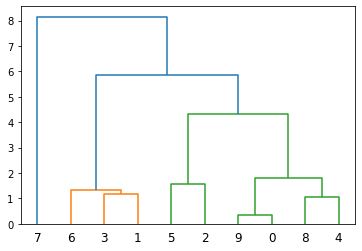

In [6]:
from scipy.cluster.hierarchy import dendrogram   # sklearn에서 제공하지 않아서 사이파이 사용
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

linked = linkage(X, 'complete')                  # linkage 함수로 데이터를 연결, 연결 방법은 완전 연결 
labels1 = label_aggc                             # 데이터 라벨

dendrogram(linked,                               # 각 데이터 포인트의 라벨은 클러스터 개수를 지정하지 않았던 아이로
          orientation = 'top',
          labels = labels1,                      # 이 라벨을 기준으로 덴드로그램 그림
          show_leaf_counts = True)
plt.show()

## 두 개로 클러스터링 한 것 시각화

실습엔 따로 없지만 진행해본다.

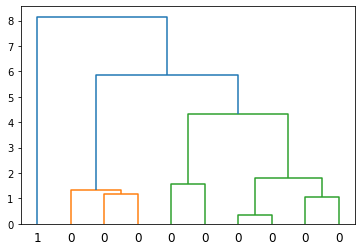

In [7]:
linked = linkage(X, 'complete')                  # linkage 함수로 데이터를 연결, 연결 방법은 완전 연결 
labels2 = label_aggc2                            # 데이터 라벨

dendrogram(linked,                               # 각 데이터 포인트의 라벨은 클러스터 개수를 지정하지 않았던 아이로
          orientation = 'top',
          labels = labels2,                      # 이 라벨을 기준으로 덴드로그램 그림
          show_leaf_counts = True)
plt.show()

그림은 똑같다. 방식은 같게 되지만 1이 0과는 완전히 따로 분류되어서, 조금씩 묶이는 주황선과 초록선과 달리 분리되어있다.

## 세 개로 클러스터링 한 것 시각화

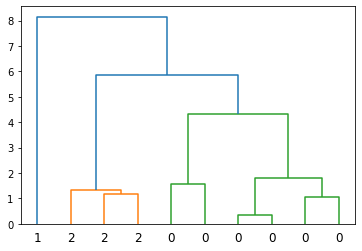

In [8]:
linked = linkage(X, 'complete')                  # linkage 함수로 데이터를 연결, 연결 방법은 완전 연결 
labels3 = label_aggc3                            # 데이터 라벨

dendrogram(linked,                               # 각 데이터 포인트의 라벨은 클러스터 개수를 지정하지 않았던 아이로
          orientation = 'top',
          labels = labels3,                      # 이 라벨을 기준으로 덴드로그램 그림
          show_leaf_counts = True)
plt.show()

세 개의 라벨이기 때문에 0, 1, 2로 나뉘는데 2가 따로 되어있는 것을 잘 볼 수 있었다!